## Задача 1. Минимизация гладкой функции
Рассмотрим сложную математическую функцию на промежутке [1, 30]  

$$ f(x) = \sin(\frac{x}{5}) \cdot e^{\frac{x}{10}} + 5 \cdot e^{\frac{-x}{2}} $$

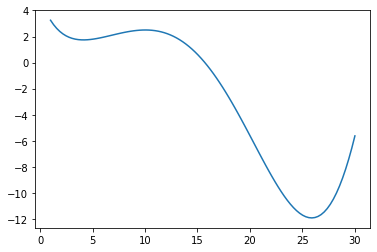

In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    result = np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)
    return result
a = np.linspace(1, 30, 100) # генерируем 100 значений от 1 до 30 включительно
y = f(a)
plt.plot(a, y)
plt.show()

Попробуем найти минимум, используя стандартные параметры в функции `scipy.optimize.minimize` (т.е. задав только функцию и начальное приближение). Меняя начальное приближение можно изучить, меняется ли результат.

In [16]:
from scipy import optimize
print(optimize.minimize(f, 26))

      fun: -11.898894665979789
 hess_inv: array([[1.67276794]])
      jac: array([1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([25.8801953])


Укажем в `scipy.optimize.minimize` в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустим из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно.

In [18]:
print(optimize.minimize(f, 2, method='BFGS'))

      fun: 1.7452682903449388
 hess_inv: array([[5.98752437]])
      jac: array([-2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627618])


Значение функции в точке минимума 4.13627618 равно 1.7452682903449388.  
Теперь изменим начальное приближение на x=30.

In [19]:
print(optimize.minimize(f, 30, method='BFGS'))

      fun: -11.898894665981285
 hess_inv: array([[1.67932484]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019339])


Значение функции в точке минимума 25.88019339 равно -11.898894665981285.   
Полученный результат отличается в зависимости от начального приближения, так как мы попадаем в локальные минимумы. Градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

## Задача 2. Глобальная оптимизация
Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию. 

Обратим внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у нас функция одного аргумента, возьмём границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации `scipy.optimize.differential_evolution` длина этого списка используется чтобы определить количество аргументов функции.  

Запустим поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30].

In [23]:
print(optimize.differential_evolution(f, [(1, 30)]))

     fun: array([-11.89889467])
     jac: array([0.])
 message: 'Optimization terminated successfully.'
    nfev: 83
     nit: 4
 success: True
       x: array([25.88019328])


Значение функции в точке глобального минимума 25.88019248 равно -11.89889467. дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.

Сравним количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении (nit: 6), с количеством итераций, потребовавшихся дифференциальной эволюции (nit: 4). При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

## Задача 3. Минимизация негладкой функции
Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30]. То есть теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.  
Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

[3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -2, -2, -3, -3, -3, -4, -4, -5, -5, -6, -6, -6, -7, -7, -8, -8, -9, -9, -9, -10, -10, -10, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -11, -10, -10, -9, -9, -8, -8, -7, -6, -5]


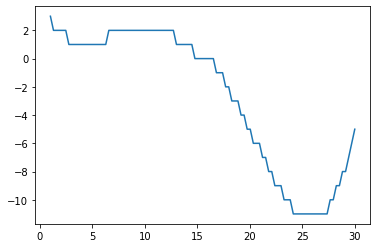

In [49]:
def h(x):
    return int(f(x))
y2 = []
for element in a:
    y2.append(h(element))
print(y2)
plt.plot(a, y2)
plt.show()

Попробуем найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30.

In [42]:
print(optimize.minimize(h, 30, method='BFGS'))

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])


Значение функции в точке минимума 30. равно -5.  
Теперь попробуем найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции.

In [43]:
print(optimize.differential_evolution(h, [(1, 30)]))

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([26.58893581])


Значение функции в точке глобального минимума 26.58893581 равно -11.  

Обратим внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Выбор разных начальных приближений даёт понять, почему минимум, найденный BFGS, именно такой. BFGS завершил свою работу на первой же итерации, попав в локальный минимум.